**Regresion Lineal**


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix


**Lectura de Datos**

In [68]:
data = pd.read_csv("dataregresionlineal.csv")
data.head(50)
#lectura de los datos 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,"Maruti Wagon R LXI DUO BSIII,2007,96000,175000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


**Descripcion de los datos**

In [69]:
data.describe()
#aqui esta la desviacion estandar maximo minimos 

,year,selling_price,km_driven,seats
count,7772.000000,7.772000e+03,7.772000e+03,7551.000000
mean,2014.054812,6.570475e+05,6.836045e+04,5.417825
std,3.914487,8.181518e+05,5.666048e+04,0.950062
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300000e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,7.000000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


**Identificacion de los Factores Faltantes y Atipicos**

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

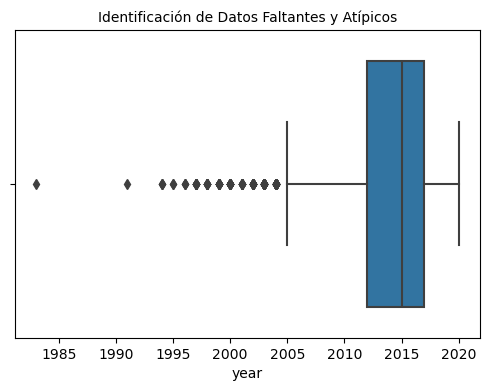

In [70]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=data['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

**Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos**


**Revision de Datos faltantes**

In [71]:
print("Cantidad de Registros con cero en Nivel de Glucosa: ",data['year'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",data['fuel'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",data['seats'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",data['engine'].isin([0]).sum())
print("Cantidad de Registros con cero en IMC: ",data['transmission'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0
Cantidad de Registros con cero en Nivel Insulina:  0
Cantidad de Registros con cero en IMC:  0


In [72]:
print("Cantidad de Registros con cero en Nivel de Glucosa: ",data['name'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",data['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",data['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",data['max_power'].isin([0]).sum())
print("Cantidad de Registros con cero en IMC: ",data['mileage'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0
Cantidad de Registros con cero en Nivel Insulina:  0
Cantidad de Registros con cero en IMC:  0


In [73]:
print("Cantidad de Registros con cero en Nivel de Glucosa: ",data['torque'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",data['owner'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",data['seller_type'].isin([0]).sum())


Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0


**Identificacion de Datos Atipicos**

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

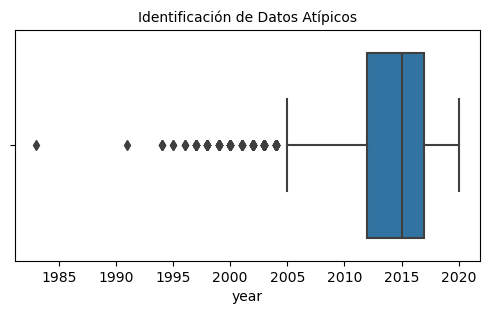

In [74]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['year'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

#NO ENCONTRAMOS MARGEN DE DATOS ATIPICOS TODO EN LO NORMAL 

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

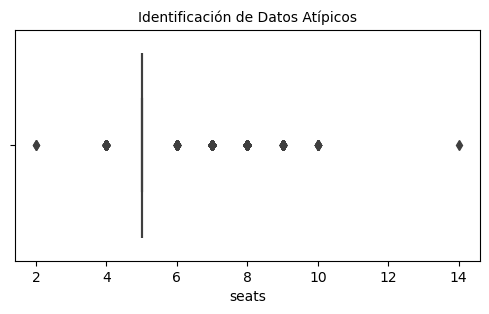

In [75]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['seats'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

#NO ENCONTRAMOS MARGEN DE DATOS ATIPICOS TODO EN LO NORMAL 

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

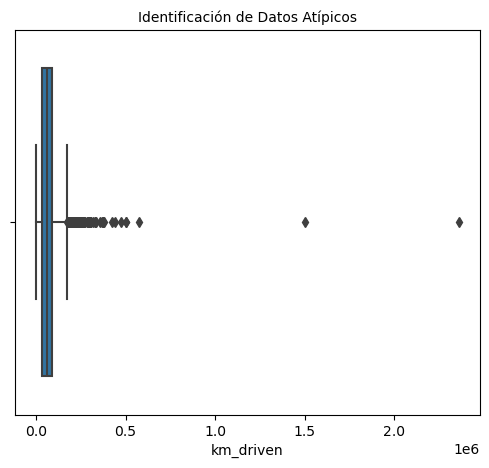

In [76]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 5))
sns.boxplot(x=data['km_driven'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

#NO ENCONTRAMOS MARGEN DE DATOS ATIPICOS TODO EN LO NORMAL 


In [77]:
#Conteo de Datos Atípicos
#coloco minimo de km 200 y maximo 380000 si es inferior a este rango y superior son datos atipicos teniendo en cuenta que son modelos de 1985 y no deberian tener menos de 200 ni el maximo colocado  

nivel_minimo=200
nivel_maximo=380000
Total_Atipicos=((data['km_driven']<nivel_minimo)|(data['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [78]:
# Filtra Datos Atípicos

data=data[(data['km_driven']<nivel_maximo)&(data['km_driven']>nivel_minimo)]


In [79]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((data['km_driven']<nivel_minimo)|(data['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [80]:
#Revisión del tipo de datos y datos faltantes
#aqui vemos el total y luego de aplicados los filtros los datos subieron a 8127
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7762 entries, 0 to 8112
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7762 non-null   object 
 1   year           7762 non-null   float64
 2   selling_price  7762 non-null   float64
 3   km_driven      7762 non-null   float64
 4   fuel           7762 non-null   object 
 5   seller_type    7762 non-null   object 
 6   transmission   7762 non-null   object 
 7   owner          7762 non-null   object 
 8   mileage        7541 non-null   object 
 9   engine         7541 non-null   object 
 10  max_power      7547 non-null   object 
 11  torque         7540 non-null   object 
 12  seats          7541 non-null   float64
dtypes: float64(4), object(9)
memory usage: 849.0+ KB


**Seleccionar las características más relevantes para entrenar el modelo**

#Caracteristica el km del vehiculo recorrido queremos predecir el precio de un vehiculo de acuerdo a la variable del km y del modelo 

In [81]:
# Total de vehiculos por modelo 


data['year'].value_counts()

year
2017.0    1016
2016.0     857
2018.0     804
2015.0     775
2013.0     664
2012.0     630
2014.0     616
2019.0     583
2011.0     558
2010.0     349
2009.0     211
2008.0     144
2007.0     118
2006.0      82
2005.0      81
2020.0      74
2004.0      53
2003.0      44
2002.0      26
2000.0      21
1999.0      15
1997.0      11
2001.0      10
1998.0      10
1996.0       3
1994.0       3
1995.0       2
1983.0       1
1991.0       1
Name: count, dtype: int64

In [82]:
# Total de vehiculos en relacion a km


data['selling_price'].value_counts()

selling_price
300000.0    217
600000.0    208
550000.0    203
350000.0    200
450000.0    195
           ... 
911999.0      1
94500.0       1
408000.0      1
654000.0      1
746000.0      1
Name: count, Length: 666, dtype: int64

**Dividir el dataset en Train y Test**

In [83]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna selling price
Y = data['selling_price'] # Se cargan los datos de train con los datos de la la columna sellinprice

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,  random_state= 0)

#elimine stratify=Y, 

In [84]:
print (X_train)

                                 name    year  km_driven    fuel  \
872          Mahindra Scorpio Getaway  2016.0   120000.0  Diesel   
4608  Maruti Swift Dzire 1.2 Lxi BSIV  2009.0   160000.0  Petrol   
419                   Toyota Etios VX  2017.0    25538.0  Petrol   
428       Hyundai Creta 1.4 CRDi Base  2017.0    45000.0  Diesel   
1182               Mahindra Bolero DI  2011.0   120000.0  Diesel   
...                               ...     ...        ...     ...   
5131               Maruti 800 AC Uniq  2004.0    18000.0  Petrol   
3391        Tata Indigo CS eGLX BS IV  2011.0    70000.0  Petrol   
1713       BMW X4 M Sport X xDrive20d  2019.0     8500.0  Diesel   
2706              Maruti Baleno Alpha  2019.0     3000.0  Petrol   
2835    Mahindra Bolero 2011-2019 ZLX  2016.0    92385.0  Diesel   

           seller_type transmission         owner     mileage   engine  \
872         Individual       Manual   First Owner   11.0 kmpl  2179 CC   
4608        Individual       Manual

In [85]:
print (Y_train)

872      750000.0
4608     190000.0
419      625000.0
428      950000.0
1182     370000.0
          ...    
5131      50000.0
3391     181000.0
1713    5500000.0
2706     760000.0
2835     631000.0
Name: selling_price, Length: 5821, dtype: float64


**Entrenar el modelo configurando los diferentes hiperparámetros**

In [100]:
# Construir el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación
#me da este error consultando diferentes lecturas ilustran insertar en codigo import sklearn from sklearn import linear_model pero aun sigue el NameError: name 'linearRegression' is not defined



SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1305204338.py, line 6)

In [96]:
print (Y_test)

5910     600000.0
1131     550000.0
7494    3250000.0
1212     395000.0
6875     483000.0
          ...    
7736     325000.0
860     1050000.0
5990     750000.0
5997     374000.0
1363     350000.0
Name: selling_price, Length: 1941, dtype: float64


In [97]:
print (Prediccion)


NameError: name 'Prediccion' is not defined

In [89]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))


NameError: name 'Prediccion' is not defined

In [90]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

NameError: name 'Prediccion' is not defined

In [91]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

NameError: name 'Prediccion' is not defined